In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot

INDICATORS = "../dataset/indicators.csv"
INDICATORS_NO_OUTLIER = "../dataset/indicators_no_outlier.csv"
NO_OUTLIER = "../dataset/customer_supermarket_no_outlier.csv"

In [2]:
ind_no_outlier = pd.read_csv(INDICATORS_NO_OUTLIER, index_col='CustomerID')
#ind_no_outlier.CustomerID = ind_no_outlier.CustomerID.astype(int)
print(ind_no_outlier.head())
print(ind_no_outlier.info())

             Entropy     i   iu  imax  tot_sales  mean_sales  num_baskets
CustomerID                                                               
12347       1.945910  2458  103   319     481.21   68.744286            7
12348       1.386294  2341   22  1254     178.71   44.677500            4
12350      -0.000000   197   17   197      65.30   65.300000            1
12352       2.079442   473   59    98    1337.42  167.177500            8
12353      -0.000000    20    4    20      24.30   24.300000            1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4161 entries, 12347 to 18287
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entropy      4161 non-null   float64
 1   i            4161 non-null   int64  
 2   iu           4161 non-null   int64  
 3   imax         4161 non-null   int64  
 4   tot_sales    4161 non-null   float64
 5   mean_sales   4161 non-null   float64
 6   num_baskets  4161 non-null   i

### Scaling values in order to avoid bias by using a standard scaler

In [3]:
#ind_no_outlier = ind_no_outlier.drop(['Entropy'], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
scaler = MinMaxScaler()
# we could also try with the standard scaler
scaler.fit(ind_no_outlier.values)

MinMaxScaler()

In [6]:
ind_no_outlier.head().values

array([[ 1.94591015e+00,  2.45800000e+03,  1.03000000e+02,
         3.19000000e+02,  4.81210000e+02,  6.87442857e+01,
         7.00000000e+00],
       [ 1.38629436e+00,  2.34100000e+03,  2.20000000e+01,
         1.25400000e+03,  1.78710000e+02,  4.46775000e+01,
         4.00000000e+00],
       [-0.00000000e+00,  1.97000000e+02,  1.70000000e+01,
         1.97000000e+02,  6.53000000e+01,  6.53000000e+01,
         1.00000000e+00],
       [ 2.07944154e+00,  4.73000000e+02,  5.90000000e+01,
         9.80000000e+01,  1.33742000e+03,  1.67177500e+02,
         8.00000000e+00],
       [-0.00000000e+00,  2.00000000e+01,  4.00000000e+00,
         2.00000000e+01,  2.43000000e+01,  2.43000000e+01,
         1.00000000e+00]])

In [7]:
scaler.transform(ind_no_outlier.head().values)

array([[0.59041458, 0.18668794, 0.32484076, 0.2209868 , 0.22446304,
        0.21562885, 0.23076923],
       [0.42061984, 0.17779804, 0.06687898, 0.87074357, 0.08331039,
        0.13995189, 0.11538462],
       [0.        , 0.01489249, 0.05095541, 0.1362057 , 0.03039098,
        0.20479844, 0.        ],
       [0.63092975, 0.03586354, 0.18471338, 0.06740792, 0.62398802,
        0.52514779, 0.26923077],
       [0.        , 0.00144366, 0.00955414, 0.01320361, 0.01125955,
        0.07587573, 0.        ]])

In [8]:
X = scaler.fit_transform(ind_no_outlier.values)

## K-Means

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Computing the best K

In [10]:
silhouette_list = list()
for i in range(3,10):
    kmeans = KMeans(n_clusters=i, n_init=10, max_iter=150)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_list.append((silhouette_score(X, labels, metric='euclidean'),i))
    
print(silhouette_list)

[(0.34004440698378213, 3), (0.35507050378190524, 4), (0.33710539943488316, 5), (0.3191298350211798, 6), (0.3321922832203646, 7), (0.31984700943394756, 8), (0.32252030330513476, 9)]


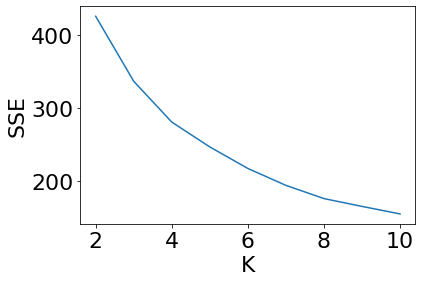

In [11]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

According to both the elbow method and silhouette score method the best value for K seems to be 4

### Clustering with K-Means

In [12]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=150)
kmeans.fit(X)
labels = kmeans.labels_

In [13]:
kmeans.labels_

array([2, 0, 1, ..., 1, 2, 0], dtype=int32)

size of each cluster

In [14]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([1229, 1939,  461,  532]))

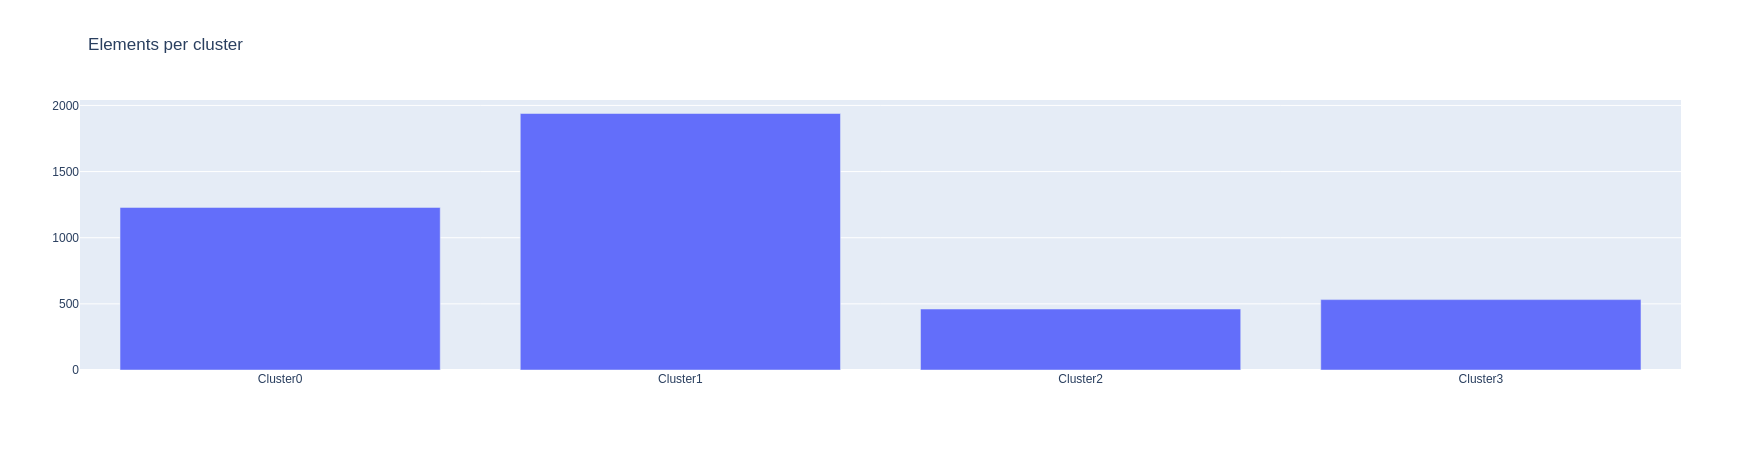

In [15]:
labels_list = ['Cluster'+str(x) for x in np.unique(kmeans.labels_, return_counts=True)[0]]
fig = px.bar(x=labels_list,y=np.unique(kmeans.labels_, return_counts=True)[1], title="Elements per cluster")
fig.update_xaxes(title="")
fig.update_yaxes(title="")
fig.show()

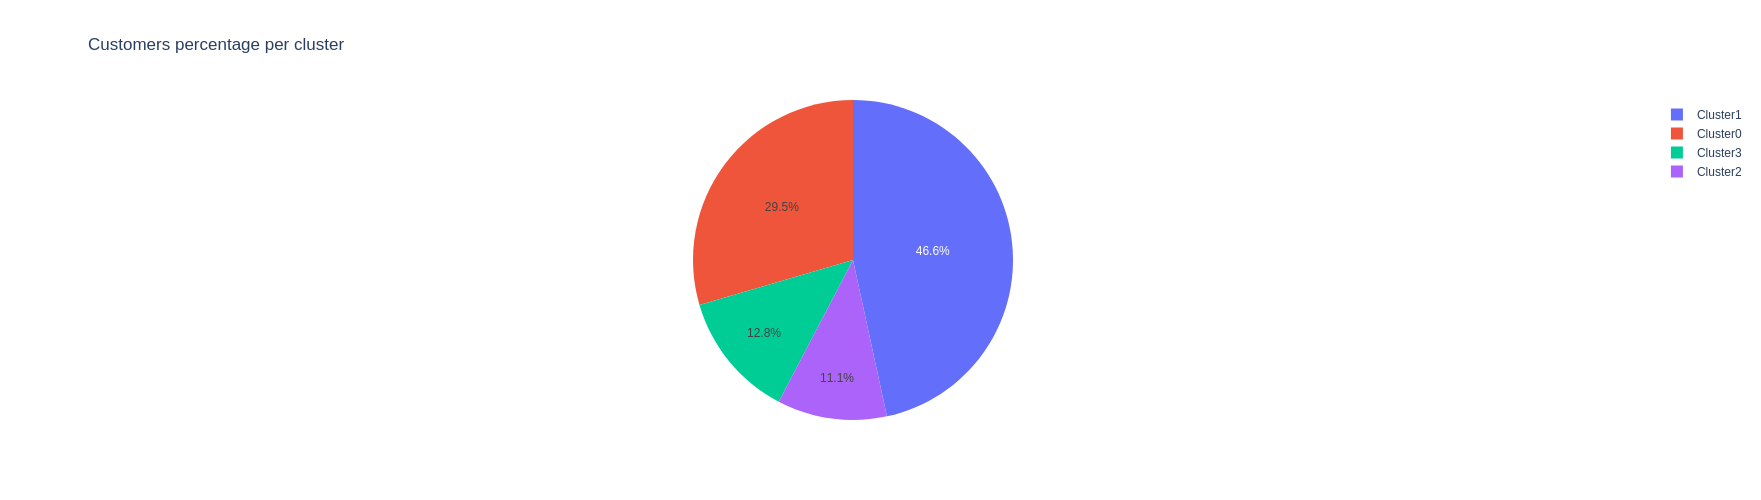

In [16]:
values = np.unique(kmeans.labels_, return_counts=True)[1]
fig = go.Figure(data=[go.Pie(labels=labels_list, values=values)])
fig.update_layout(height=500, width=500, title_text="Customers percentage per cluster")
fig.show()

## Cluster analysis

In [17]:
def clusters_mean_by_indicators(df):
    
    for idx in sorted(df['cluster_index'].unique()):
    
        temp = df[df['cluster_index'] == idx]

        entropy = temp['Entropy'].mean()
        i = temp['i'].mean()
        iu = temp['iu'].mean()
        imax = temp['imax'].mean()
        tot_sales = temp['tot_sales'].mean()
        mean_sales = temp['mean_sales'].mean()
        num_baskets = temp['num_baskets'].mean()
        
        print("====================== Mean values for Cluster "+str(idx)+" ====================== \n")
        print("Entropy: "+str(entropy))
        print("i: "+str(i))
        print("iu: "+str(iu))
        print("imax: "+str(imax))
        print("tot_sales: "+str(tot_sales))
        print("mean_sales: "+str(mean_sales))
        print("num_baskets: "+str(num_baskets))
        
        print("")
        

In [18]:
df_clustered_kmeans = ind_no_outlier.copy(deep=True)
df_clustered_kmeans['cluster_index'] = kmeans.labels_
clusters_mean_by_indicators(df_clustered_kmeans)

====================== Mean values for Cluster 0 ====================== 

Entropy: 1.4571677033299144
i: 862.9511798209927
iu: 54.08299430431245
imax: 190.13506916192026
tot_sales: 205.38664930838073
mean_sales: 45.66267951800031
num_baskets: 4.681041497152156

====================== Mean values for Cluster 1 ====================== 

Entropy: 0.22730370904846484
i: 224.53017019082
iu: 19.182568334192883
imax: 168.5569881382156
tot_sales: 59.946111913357406
mean_sales: 45.920423843905795
num_baskets: 1.3450232078390922

====================== Mean values for Cluster 2 ====================== 

Entropy: 2.314646412205461
i: 2584.5531453362255
iu: 157.7288503253796
imax: 255.65075921908894
tot_sales: 751.6269197396969
mean_sales: 75.77436790833274
num_baskets: 11.511930585683297

====================== Mean values for Cluster 3 ====================== 

Entropy: 0.6092204564018721
i: 682.406015037594
iu: 88.87781954887218
imax: 365.40413533834584
tot_sales: 303.0122575187969
mean_sales: 148

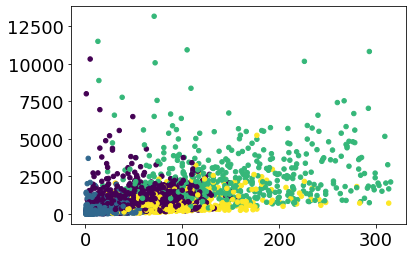

In [19]:
plt.scatter(ind_no_outlier['iu'], ind_no_outlier['i'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

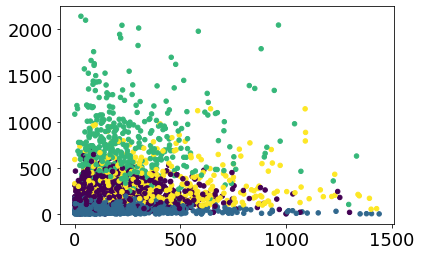

In [20]:
plt.scatter(ind_no_outlier['imax'], ind_no_outlier['tot_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

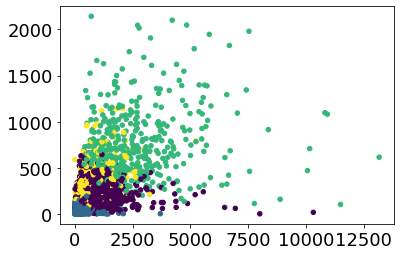

In [21]:
plt.scatter(ind_no_outlier['i'], ind_no_outlier['tot_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

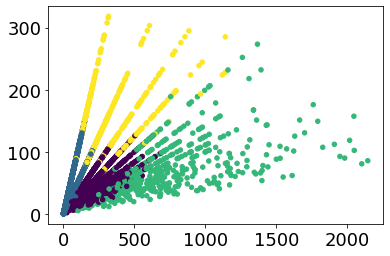

In [22]:
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['mean_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

In [23]:
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['iu'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

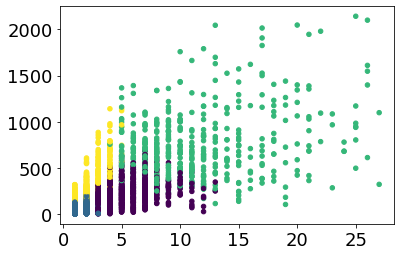

In [24]:
plt.scatter(ind_no_outlier['num_baskets'], ind_no_outlier['tot_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

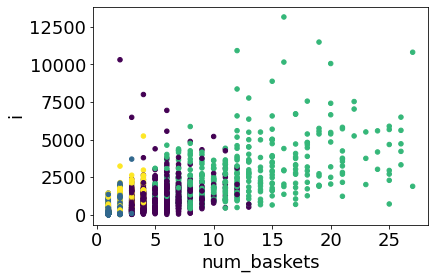

In [25]:
plt.scatter(ind_no_outlier['num_baskets'], ind_no_outlier['i'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.xlabel("num_baskets",fontsize=18)
plt.ylabel("i",fontsize=18)
plt.show()

### Cluster Centers visualization

In [26]:
kmeans.cluster_centers_

array([[0.44212373, 0.06549283, 0.16905412, 0.13143507, 0.09575826,
        0.14304974, 0.14157852],
       [0.0690025 , 0.01699081, 0.05788849, 0.11647952, 0.02787084,
        0.14368981, 0.01327697],
       [0.70229399, 0.19630371, 0.49913647, 0.1769637 , 0.35064507,
        0.23773463, 0.40430502],
       [0.18449865, 0.05168563, 0.27951387, 0.25283349, 0.14117922,
        0.46532919, 0.04192524]])

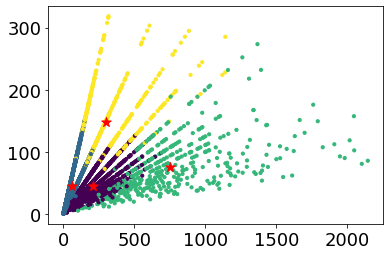

[205.38664931  59.89915944 751.62691974 302.72694371] 
 [ 45.66267952  45.86623418  75.77436791 148.15398999]


In [27]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['mean_sales'], c=kmeans.labels_, 
            s=10)
plt.scatter(centers[:, 4], centers[:, 5], s=100, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

print(centers[:, 4], "\n", centers[:, 5])

### Cluster Centers as parallel coordinates

In [28]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(ind_no_outlier.columns)), ind_no_outlier.columns, fontsize=14)
plt.legend(fontsize=10)
plt.show()

### Centroids radar chart

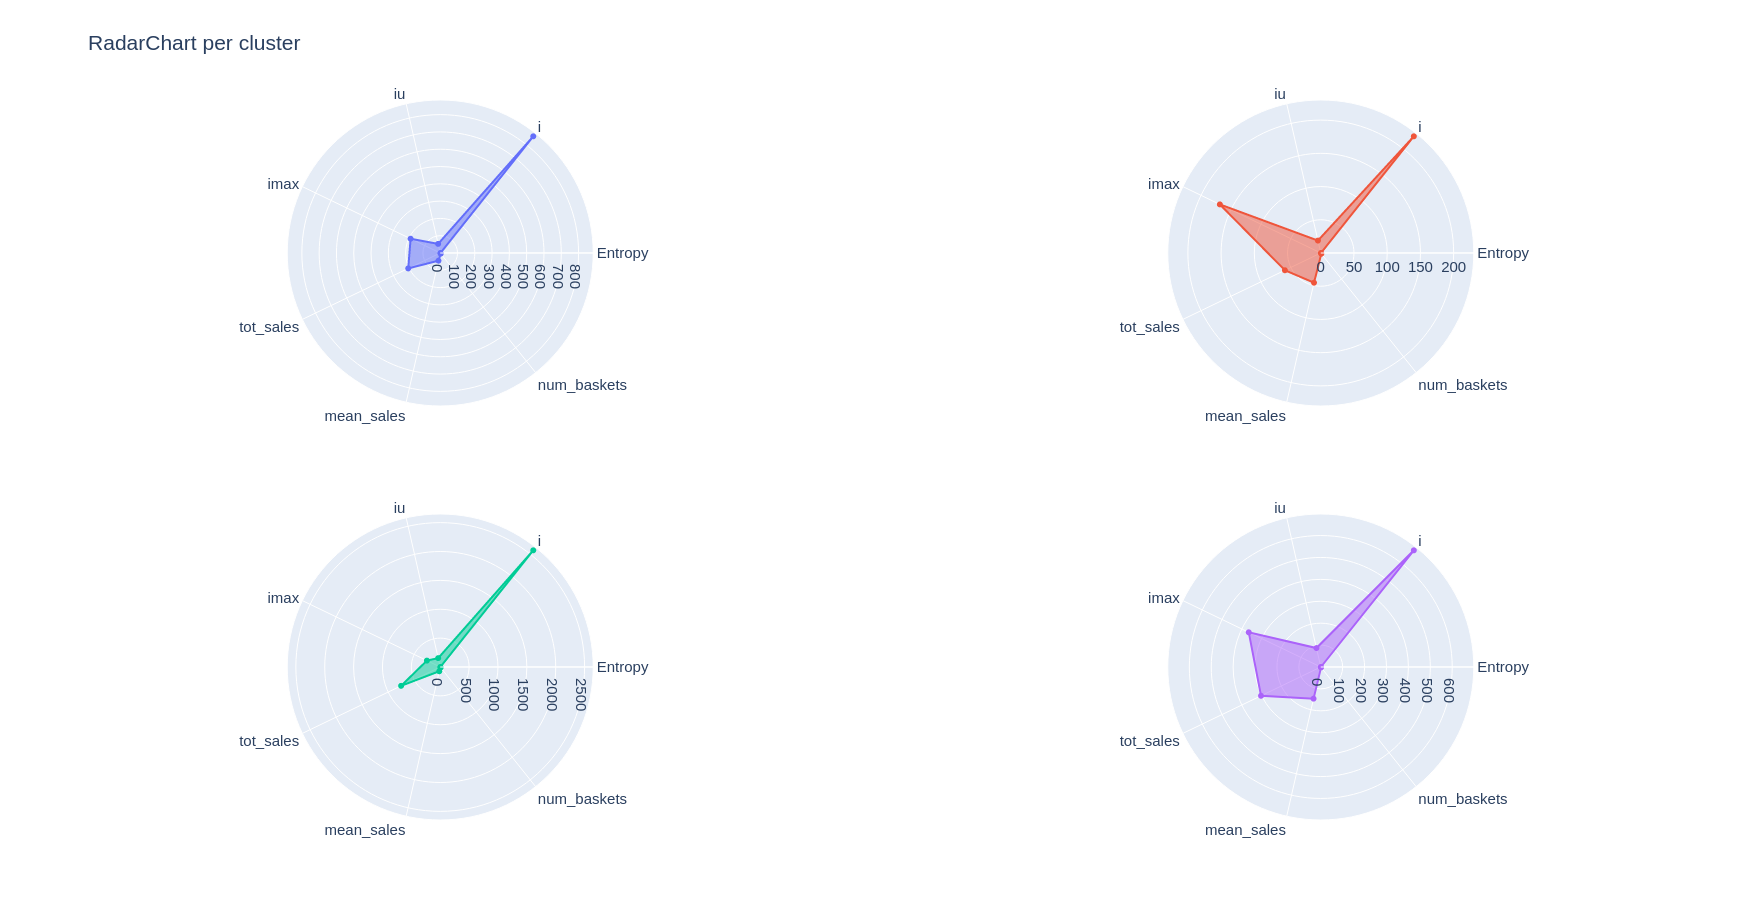

In [29]:
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolar(
        r = centers[0],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = centers[1],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
        r = centers[2],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
        r = centers[3],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 2, 2)

fig.update_layout(height=1000, width=1000,
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False,
  font=dict(
      size=15
  )
)

fig.update_layout(height=900, width=900, title_text="RadarChart per cluster")
fig.show()

### SSE and Clustering Validation

In [30]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))

SSE 280.5413830444864
Silhouette 0.35507050378190524
Separation 1.1006894654874733


## DBSCAN

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=0.15, min_samples=10)

In [33]:
dbscan.labels_

array([ 0, -1,  1, ...,  0, -1,  0])

In [34]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 321, 2373, 1467]))

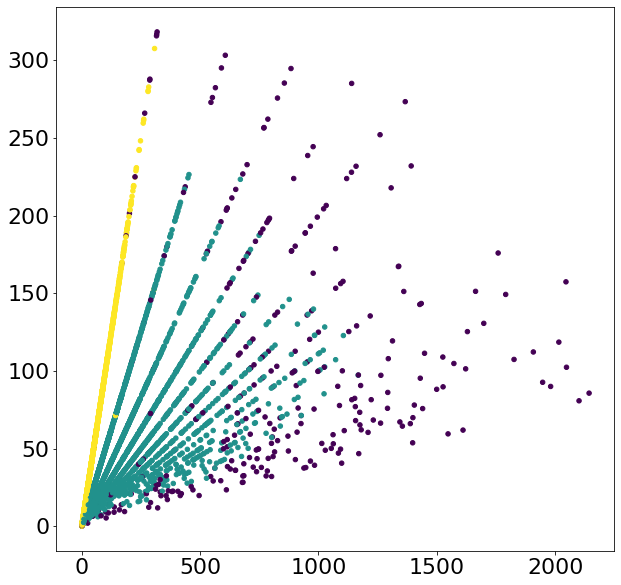

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['mean_sales'], 
            c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Best eps with knee method

In [36]:
from scipy.spatial.distance import pdist, squareform

In [37]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print(dist)

[0.74605772 0.74252258 0.56966052 ... 1.24419683 0.36688773 1.10575722]
[[0.         0.74605772 0.74252258 ... 0.61510564 0.74759271 0.4121013 ]
 [0.74605772 0.         0.87382942 ... 0.86954292 1.35913381 0.55837694]
 [0.74252258 0.87382942 0.         ... 0.25437095 1.35580378 0.44323319]
 ...
 [0.61510564 0.86954292 0.25437095 ... 0.         1.24419683 0.36688773]
 [0.74759271 1.35913381 1.35580378 ... 1.24419683 0.         1.10575722]
 [0.4121013  0.55837694 0.44323319 ... 0.36688773 1.10575722 0.        ]]


In [38]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

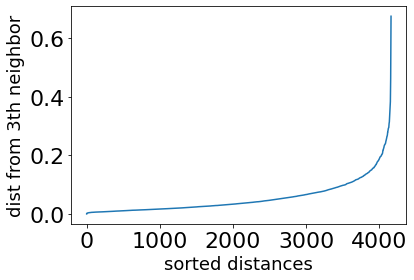

In [39]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

### Cluster analysis

In [40]:
df_clustered_dbscan = ind_no_outlier.copy(deep=True)
df_clustered_dbscan['cluster_index'] = dbscan.labels_
clusters_mean_by_indicators(df_clustered_dbscan)

====================== Mean values for Cluster -1 ====================== 

Entropy: 2.024003784122149
i: 3033.93769470405
iu: 160.95015576323988
imax: 443.1869158878505
tot_sales: 762.2403457943932
mean_sales: 101.54860418870699
num_baskets: 10.610591900311526

====================== Mean values for Cluster 0 ====================== 

Entropy: 1.2528668619328875
i: 757.983565107459
iu: 59.9401601348504
imax: 191.8221660345554
tot_sales: 228.00689506953222
mean_sales: 57.370402003984616
num_baskets: 4.168984407922461

====================== Mean values for Cluster 1 ====================== 

Entropy: 0.0
i: 189.40763462849353
iu: 20.283571915473757
imax: 187.66257668711657
tot_sales: 61.77145262440355
mean_sales: 61.46502340377187
num_baskets: 1.0102249488752557



### Clustering Validation

In [41]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, dbscan.labels_))

Silhouette 0.2990409529684644
Separation 1.3157336876002772


## Validating outliers with DBSCAN

In [42]:
ind_outlier = pd.read_csv(INDICATORS, index_col='CustomerID')

scaler = MinMaxScaler()
# we could also try with the standard scaler
scaler.fit(ind_outlier.values)
X_outlier = scaler.fit_transform(ind_outlier.values)

dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(X_outlier)

DBSCAN(eps=0.15, min_samples=10)

In [43]:
ind_outlier['cluster_index'] = dbscan.labels_

outliers = ind_outlier[ind_outlier['cluster_index'] == -1].reset_index()
outliers_list = outliers.CustomerID.values

In [44]:
ind_no_outlier = pd.read_csv(INDICATORS_NO_OUTLIER, index_col='CustomerID')

no_outliers = ind_no_outlier.reset_index()
no_outliers_list = no_outliers.CustomerID.values

In [45]:
print("These customers have been detected as outliers by DBSCAN: ", outliers_list)

These customers have been detected as outliers by DBSCAN:  [12415 12536 12688 12748 12971 13089 13256 13408 13694 14096 14156 14298
 14527 14606 14646 14911 15061 15311 16422 16984 17404 17450 17511 17841
 17846 17940 18102 18251]


In [46]:
for el in outliers_list:
    if el in no_outliers_list:
        print(str(el)+" is an outlier but is still in the dataframe")

## Hierarchical clustering

In [47]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

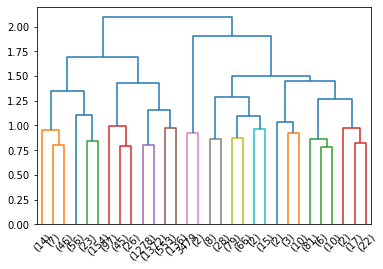

In [48]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

In [49]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

In [50]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1, truncate_mode='lastp')

## Alternative clustering techniques

## X-means

In [51]:
mat = np.asmatrix(ind_no_outlier).tolist()

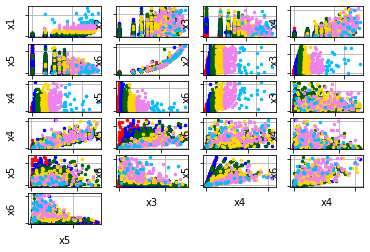

In [52]:
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(mat, amount_initial_centers).initialize()
# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 10.
xmeans_instance = xmeans(mat, initial_centers, 6, ccore=False)
xmeans_instance.process()
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Visualize clustering results

visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, mat)
# visualizer.append_cluster(centers, None, marker='*', markersize=10)
fig = visualizer.show()

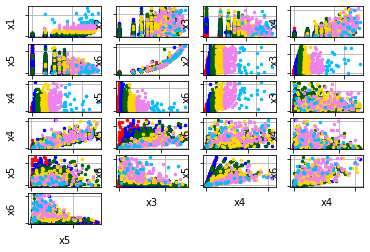

NoneType

In [53]:
type(visualizer.show())

## BIRCH

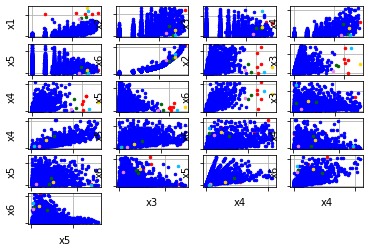

In [54]:
from pyclustering.cluster.birch import birch
from pyclustering.cluster import cluster_visualizer_multidim

# Create BIRCH algorithm
birch_instance = birch(mat, 6, diameter=1.5)
 
# Cluster analysis
birch_instance.process()
 
# Obtain results of clustering
clusters = birch_instance.get_clusters()
 
# Visualize allocated clusters
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, mat)
visualizer.show()

In [55]:
from pyclustering.cluster.birch import birch, measurement_type
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FAMOUS_SAMPLES
import matplotlib.pyplot as plt


# Sample for cluster analysis (represented by list)
sample = read_sample(FAMOUS_SAMPLES.SAMPLE_OLD_FAITHFUL)
# Create BIRCH algorithm
birch_instance = birch(sample, 2)
# Cluster analysis
birch_instance.process()
# Obtain results of clustering
clusters = birch_instance.get_clusters()
# Visualize allocated clusters
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
fig = visualizer.show()

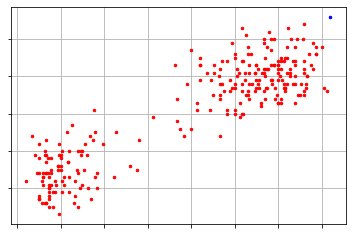

In [56]:
fig = visualizer.show()

In [57]:
type(fig)

matplotlib.figure.Figure

In [58]:
fig.set_size_inches(15,15)

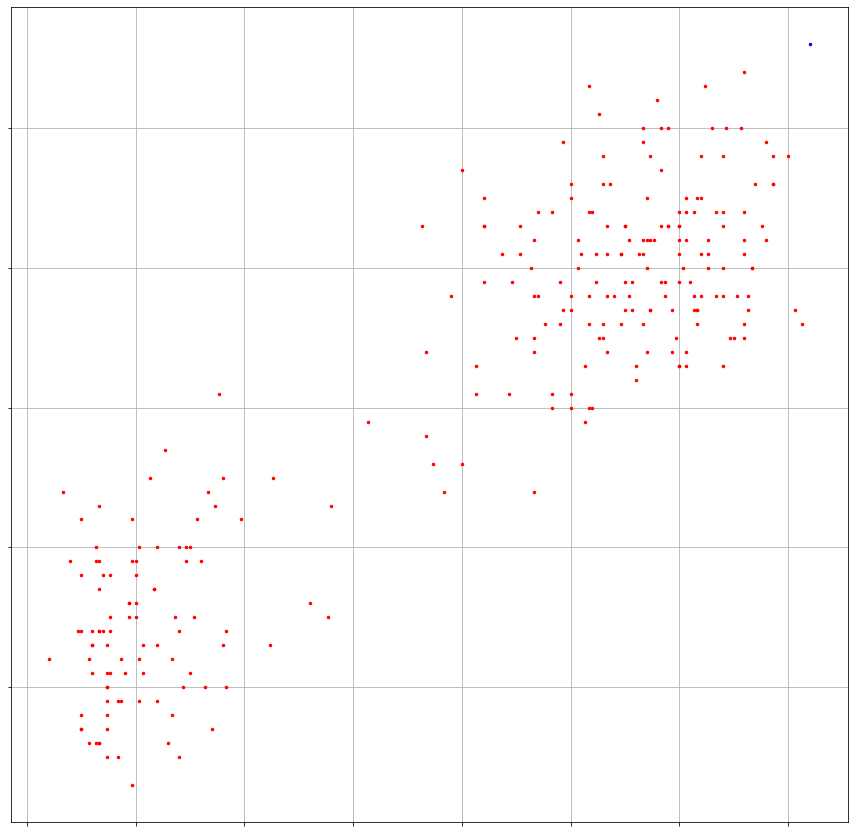

In [59]:
fig